# Logistic Regression

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
N_SEED = 19
TOP_K = 5
VERBOSE = 1
N_JOBS = 4
COLOR_MAP = "RdYlBu"
DOT_SIZE = 4
TEST_RATIO = 0.2
L_FONT = {
    "color": "darkblue",
    "size": 11
}
T_COLOR = "darkred"

np.random.seed(N_SEED)
plt.style.use("ggplot")

In [3]:
dataset = pd.read_csv("../data/QC.csv")

In [4]:
dataset[:TOP_K]

,Voltage,Defect
0,1.10,0
1,1.90,0
2,2.00,0
3,2.30,0
4,2.91,0


In [5]:
X = np.array(dataset.drop(columns=["Defect"], axis=1))
y = np.array(dataset["Defect"])

In [6]:
def show_corr(features, target):
    features.corrwith(target).plot.bar(color="purple", grid=True)
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(T_COLOR)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(T_COLOR)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def show_corr_heatmap(data):
    corr = data.corr() * 100
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr, annot=True, cmap=COLOR_MAP, fmt=".2f")
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(T_COLOR)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(T_COLOR)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_features(x, target):
    _, col = x.shape
    for i in range(col):
        plt.scatter(x[:, i], target, color="red", s=DOT_SIZE,)
        plt.xlabel("X: {i}".format(i=i), fontdict=L_FONT)
        plt.ylabel("y", fontdict=L_FONT)
        ax = plt.gca()
        ax.spines["bottom"].set_color(T_COLOR)
        ax.spines["top"].set_color(None)
        ax.spines["left"].set_color(T_COLOR)
        ax.spines["right"].set_color(None)
        ax.tick_params(axis="x", colors=T_COLOR)
        ax.tick_params(axis="y", colors=T_COLOR)
        plt.show();
        plt.hist(x[:, i], color="green")
        plt.xlabel("X: {i}".format(i=i), fontdict=L_FONT)
        plt.ylabel("Population", fontdict=L_FONT)
        ax = plt.gca()
        ax.spines["bottom"].set_color(T_COLOR)
        ax.spines["top"].set_color(None)
        ax.spines["left"].set_color(T_COLOR)
        ax.spines["right"].set_color(None)
        ax.tick_params(axis="x", colors=T_COLOR)
        ax.tick_params(axis="y", colors=T_COLOR)
        plt.show();


def plot_class_dist(target):
    unique, counts = np.unique(target, return_counts=True)
    plt.bar(unique, counts, color="darkblue",)
    plt.xlabel("Class", fontdict=L_FONT)
    plt.ylabel("Population", fontdict=L_FONT)
    ax = plt.gca()
    ax.set_xticks(ticks=unique, labels=unique)
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_roc(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color="#1ecbe1", label="AUC = {.4f}".format(roc_auc),)
    plt.legend(loc = "lower right")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel("TPR", fontdict=L_FONT)
    plt.xlabel("FPR", fontdict=L_FONT)
    ax = plt.gca()
    ax.set_title("Receiver Operating Characteristic", fontdict={"color": "darkblue"})
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_classification(y_true, y_pred):
    precision, recall, f1, support = metrics.precision_recall_fscore_support(y_true, y_pred)
    sns.heatmap(
        (precision*100, recall*100, f1*100),
        annot=True, cmap=COLOR_MAP,
        fmt=".4f",
        yticklabels=("precision", "recall", "f1")
    )
    ax = plt.gca()
    ax.set_title("Classification Report", fontdict=L_FONT)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_Xy(x, target, x_line=None, y_line=None, file_name=None):
    plt.scatter(x, target, color="red", s=DOT_SIZE,)
    # plt.axis([0, None, 0, None])
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    if x_line is not None and y_line is not None:
        plt.plot(x_line, y_line,'-', color="orange")
    plt.xlabel("X", fontdict=L_FONT)
    plt.ylabel("y", fontdict=L_FONT)
    if file_name is not None:
        plt.savefig(file_name)
    plt.show();


def plot_Xy2(x, target, x2=None, target2=None, file_name=None):
    plt.scatter(x, target, color="red", s=DOT_SIZE,)
    # plt.axis([0, None, 0, None])
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    if x2 is not None and target2 is not None:
        plt.plot(x2, target2, '-', color="orange", linewidth=2)
    plt.xlabel("X", fontdict=L_FONT)
    plt.ylabel("y", fontdict=L_FONT)
    if file_name is not None:
        plt.savefig(file_name)
    plt.show();

## Self-created dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_RATIO,
    random_state=N_SEED,
    stratify=y,
)

### EDA

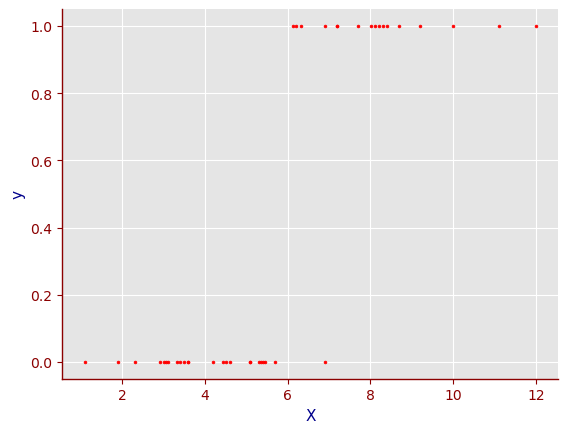

In [8]:
plot_Xy(
    X_train,
    y_train,
)

In [9]:
model_LNR = LinearRegression(
    n_jobs=N_JOBS
).fit(X_train, y_train)

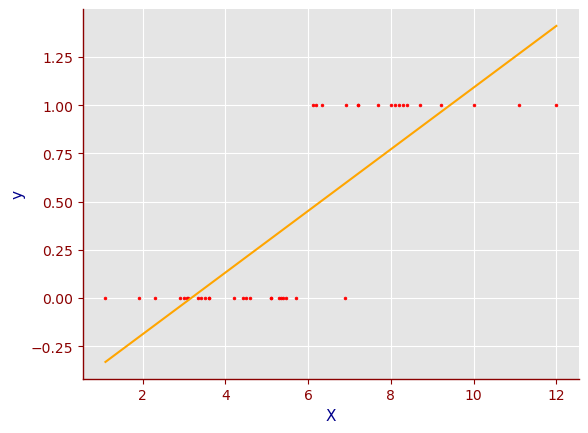

In [10]:
X_line = [X_train.min(), X_train.max()]
y_line = [model_LNR.predict([[X_train.min()]])[0], model_LNR.predict([[X_train.max()]])[0]]

plot_Xy(
    X_train,
    y_train,
    X_line,
    y_line,
)

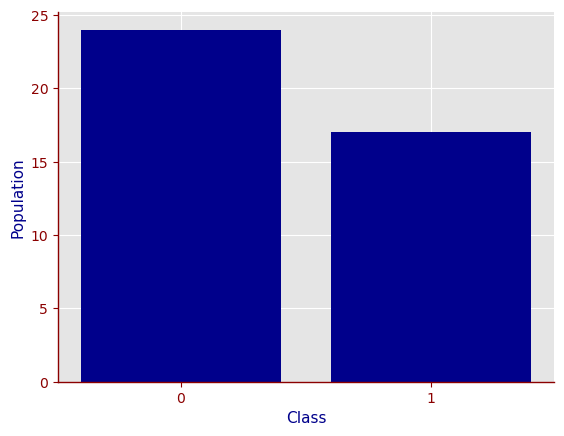

In [11]:
plot_class_dist(
    y_train
)

### Create a model and fit data into the model

https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

In [12]:
model_LGR = LogisticRegression(
    solver="newton-cholesky",
    penalty="l2",
    random_state=N_SEED,
    n_jobs = N_JOBS,
    verbose=VERBOSE,
).fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Newton iter=1
  Check Convergence
    1. max |gradient| 0.18889703061765592 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.06255228412069916 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.016735801935966577 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.0024081187632904386 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 5.992824137510122e-05 <= 0.0001
    2. Newton decrement 7.52969583474835e-05 <= 0.0001
  Solver did converge at loss = 0.18508112889928707.


In [13]:
X_curve = (np.arange(230)*0.05 + 0.9).reshape(-1, 1)

In [14]:
y_curve = model_LGR.predict_proba(X_curve)

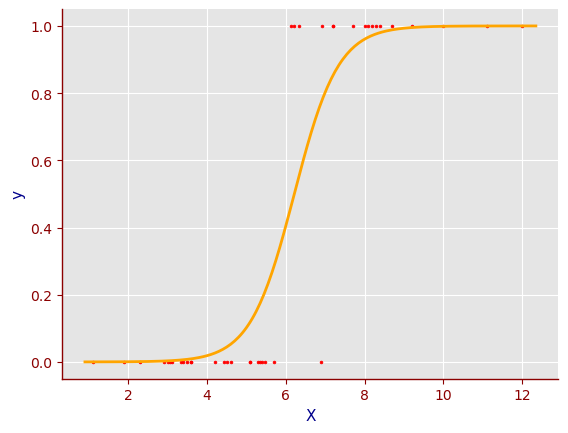

In [15]:
plot_Xy2(
    X_train,
    y_train,
    X_curve.reshape(-1,),
    y_curve[:, 1],
)

### Predict

In [16]:
y_pred_LGR = model_LGR.predict(X_test)
y_prob_LGR = model_LGR.predict_proba(X_test) * 100

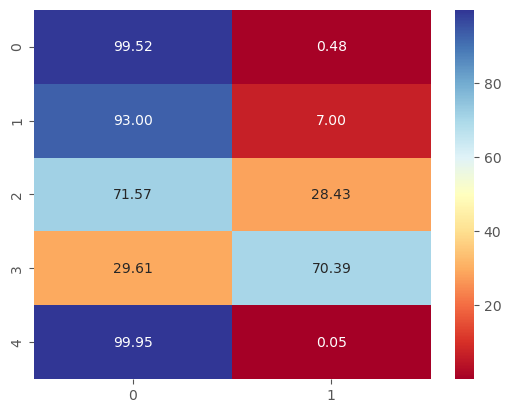

In [17]:
sns.heatmap(y_prob_LGR[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".2f");

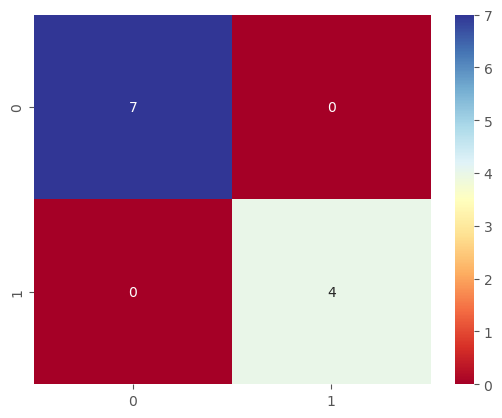

In [18]:
cm_LGR = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_LGR)
sns.heatmap(cm_LGR, annot=True, cmap=COLOR_MAP, fmt=".0f");

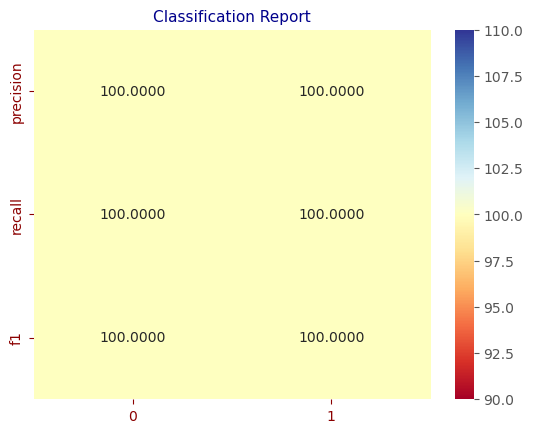

In [19]:
plot_classification(y_true=y_test, y_pred=y_pred_LGR)

## Iris dataset (classification problem)

In [20]:
X1, y1 = load_iris(return_X_y=True)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=N_SEED, stratify=y1)

In [21]:
X1[:TOP_K], y1[:TOP_K]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

### EDA

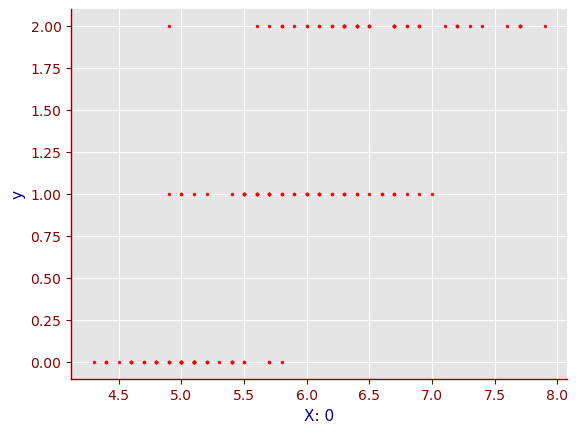

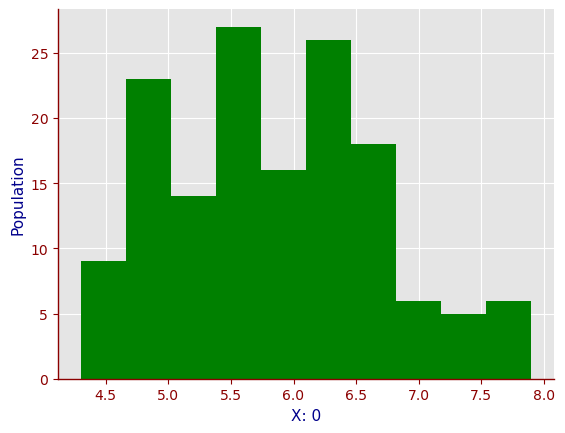

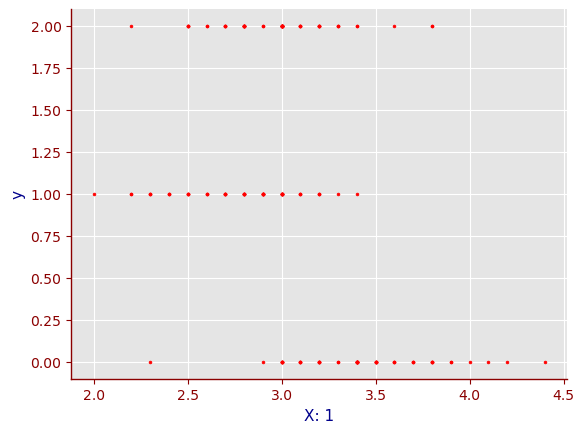

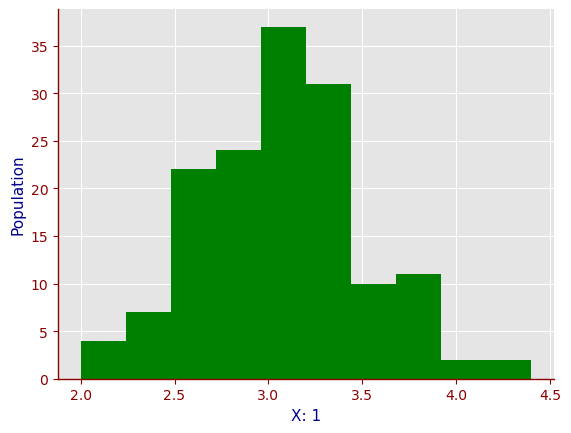

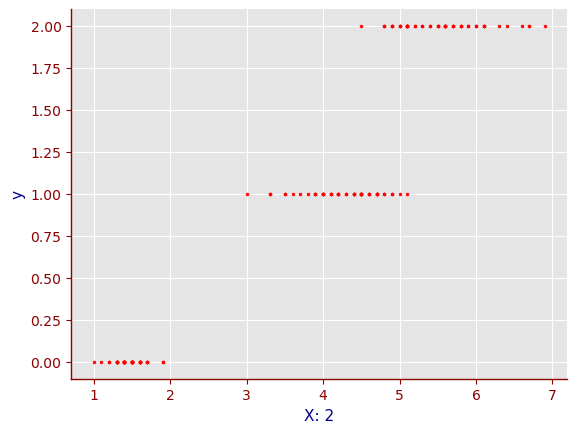

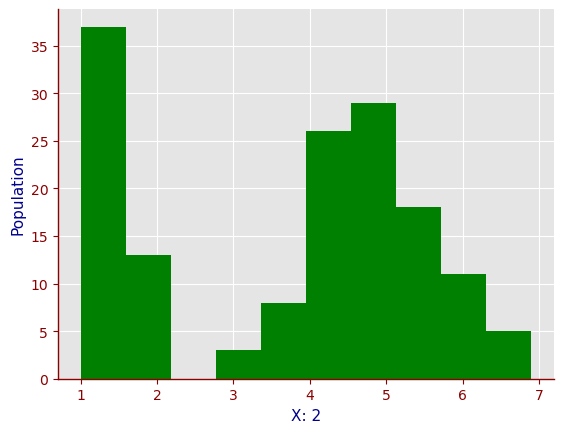

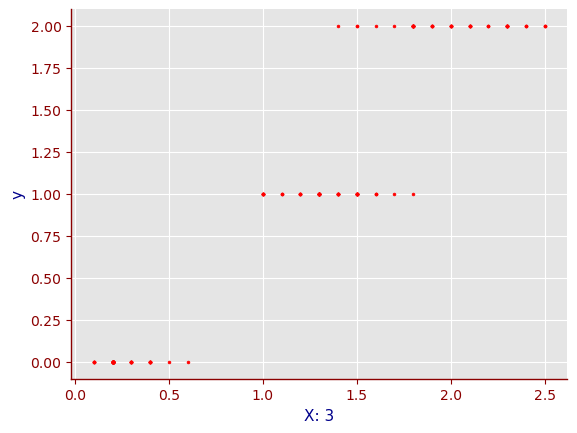

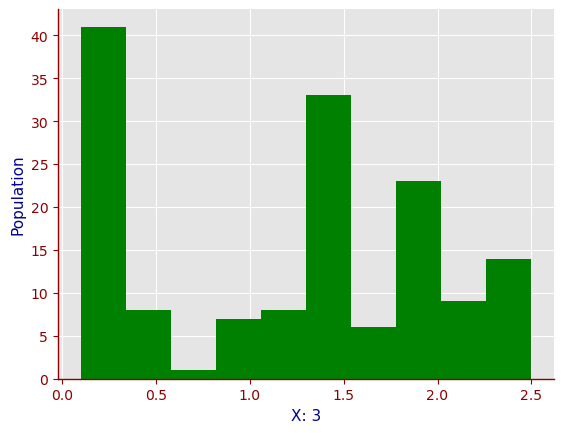

In [22]:
plot_features(X1, y1)

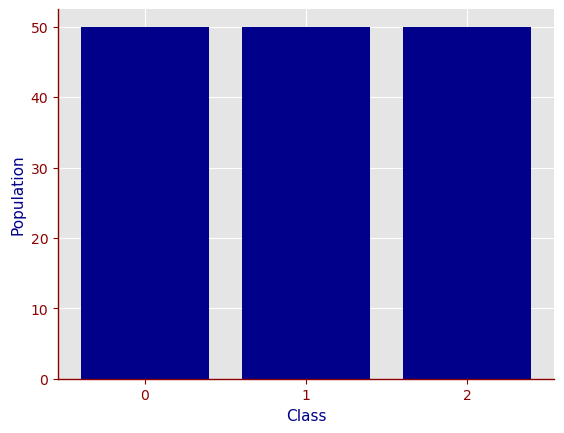

In [23]:
plot_class_dist(y1)

### Create a model and fit data into the model

In [24]:
model1_LGR = LogisticRegression(
    solver="newton-cg",
    random_state=N_SEED,
    n_jobs = N_JOBS,
    verbose=VERBOSE,
).fit(X1_train, y1_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Newton-CG iter = 0
  Check Convergence
    max |gradient| <= tol: 0.7627777777777777 <= 0.0001 False
Newton-CG iter = 1
  Check Convergence
    max |gradient| <= tol: 0.45258078336738894 <= 0.0001 False
Newton-CG iter = 2
  Check Convergence
    max |gradient| <= tol: 0.2873271762603562 <= 0.0001 False
Newton-CG iter = 3
  Check Convergence
    max |gradient| <= tol: 0.232529478817142 <= 0.0001 False
Newton-CG iter = 4
  Check Convergence
    max |gradient| <= tol: 0.14902843268469937 <= 0.0001 False
Newton-CG iter = 5
  Check Convergence
    max |gradient| <= tol: 0.06356758988083912 <= 0.0001 False
Newton-CG iter = 6
  Check Convergence
    max |gradient| <= tol: 0.0160684215144483 <= 0.0001 False
Newton-CG iter = 7
  Check Convergence
    max |gradient| <= tol: 0.027967605153275208 <= 0.0001 False
Newton-CG iter = 8
  Check Convergence
    max |gradient| <= tol: 0.004126070807493245 <= 0.0001 False
Newton-CG iter = 9
  Check Convergence
    max |gradient| <= tol: 0.00352289802249572

### Predict

In [25]:
y1_pred_LGR = model1_LGR.predict(X1_test)
y1_prob_LGR = model1_LGR.predict_proba(X1_test) * 100

In [26]:
# y true
y1_test[:TOP_K]

array([0, 2, 2, 1, 1])

In [27]:
# y predict
y1_pred_LGR[:TOP_K]

array([0, 2, 2, 1, 1])

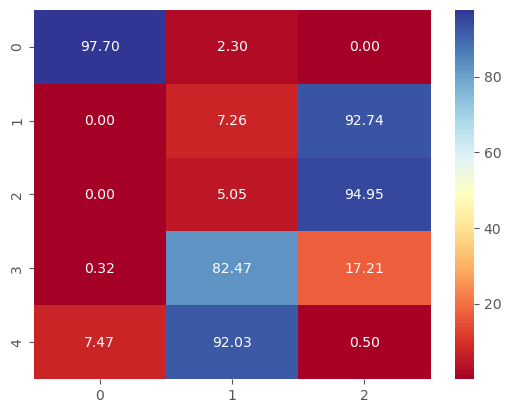

In [28]:
sns.heatmap(y1_prob_LGR[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".2f");

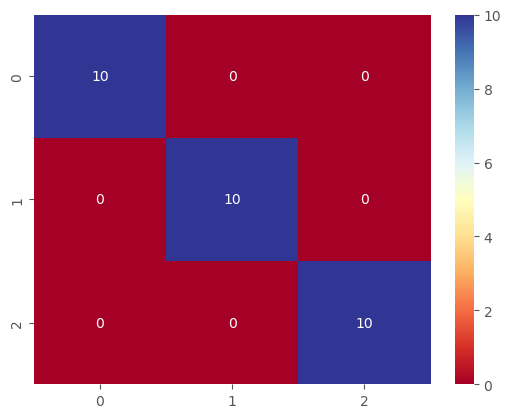

In [29]:

cm1_LGR = metrics.confusion_matrix(y_true=y1_test, y_pred=y1_pred_LGR)
sns.heatmap(cm1_LGR, annot=True, cmap=COLOR_MAP, fmt=".0f");

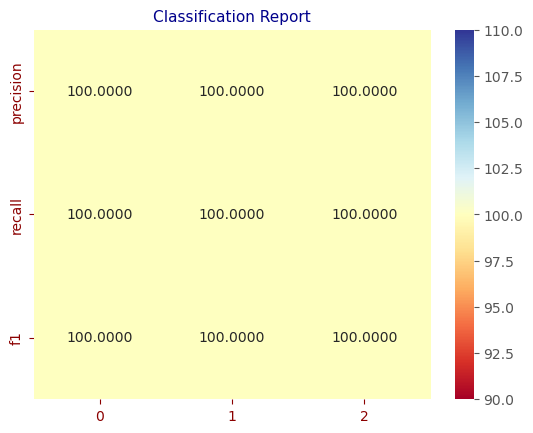

In [30]:
plot_classification(y_true=y1_test, y_pred=y1_pred_LGR)